# seaborn (barplot) 

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

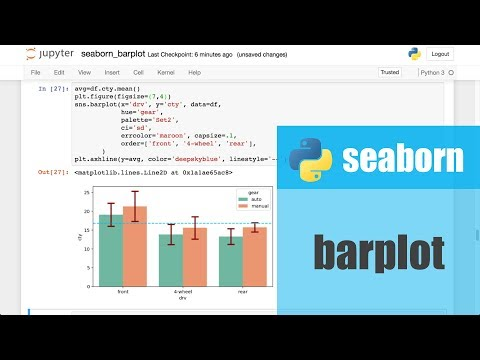

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('A9U_lRSRHyE', width=720, height=405)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.25.3
seaborn version = 0.9.0


## read miles per gallon dataset (mpg.csv)

In [4]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


## wide format

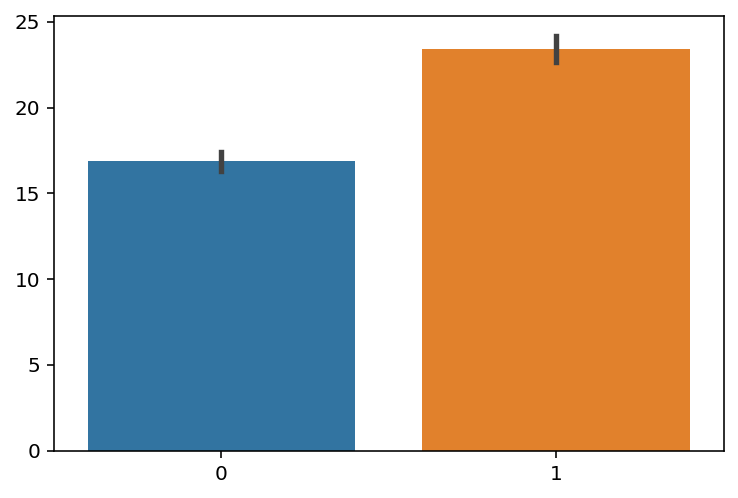

In [6]:
sns.barplot(data=[df.cty, df.hwy])
# notice: no x-axis label

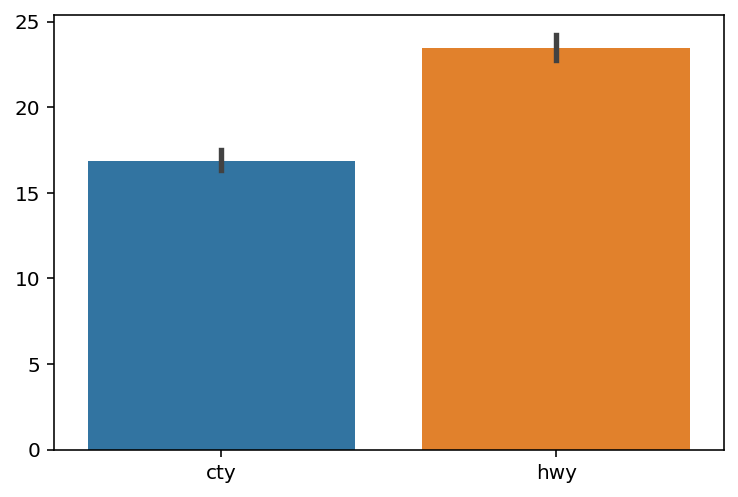

In [7]:
# wide format
sns.barplot(data=df[['cty', 'hwy']]) # with correct x-axis label

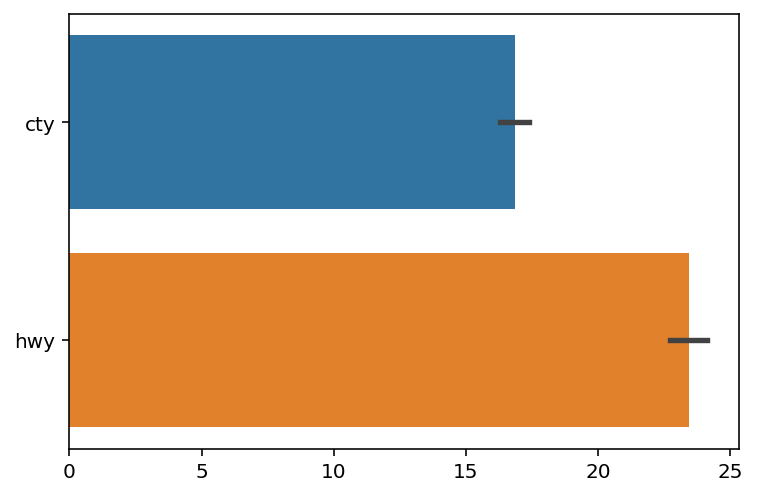

In [8]:
sns.barplot(data=df[['cty', 'hwy']], orient='h') # with correct x-axis label

## long format

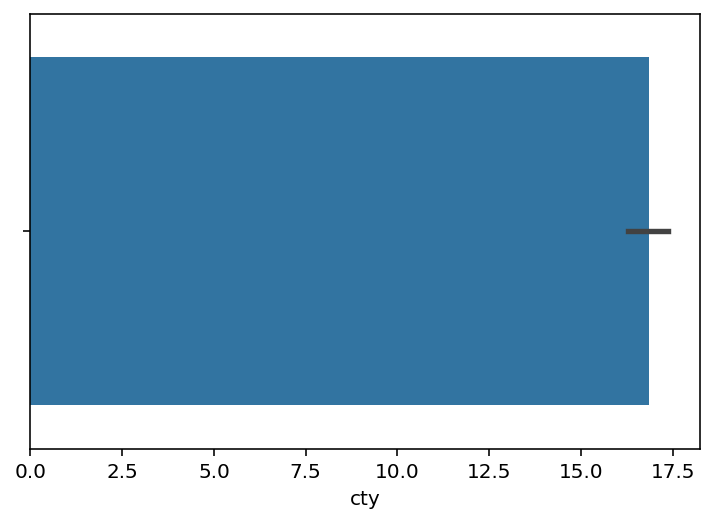

In [9]:
sns.barplot(x='cty', data=df)

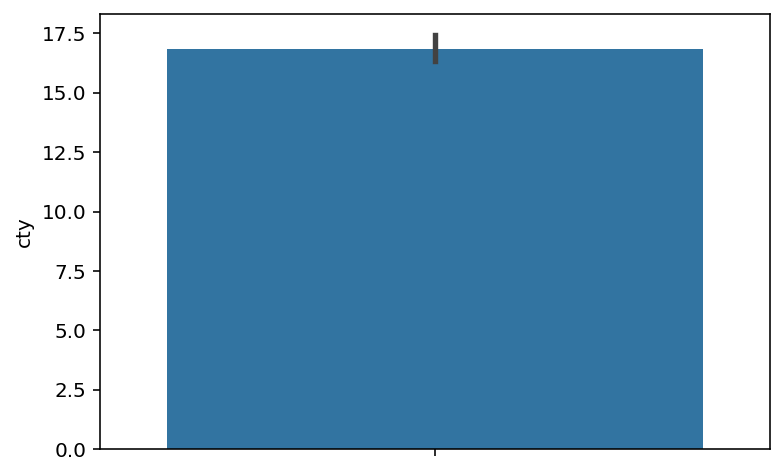

In [10]:
sns.barplot(y='cty', data=df)

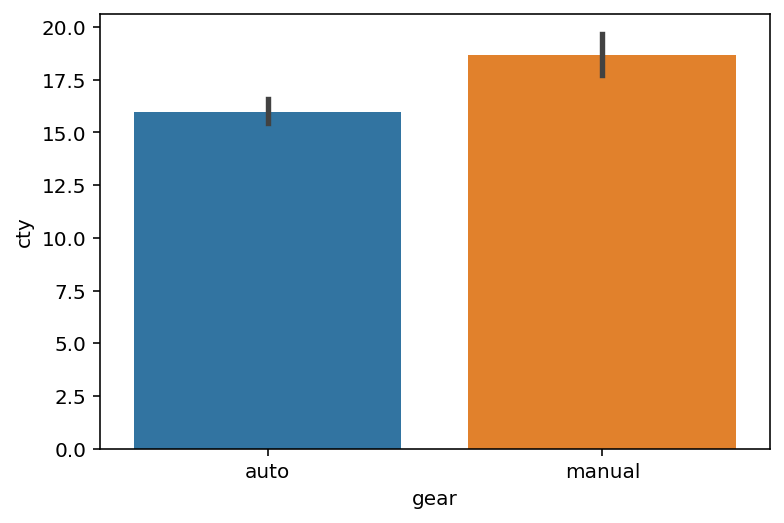

In [11]:
sns.barplot(x='gear', y='cty', data=df)

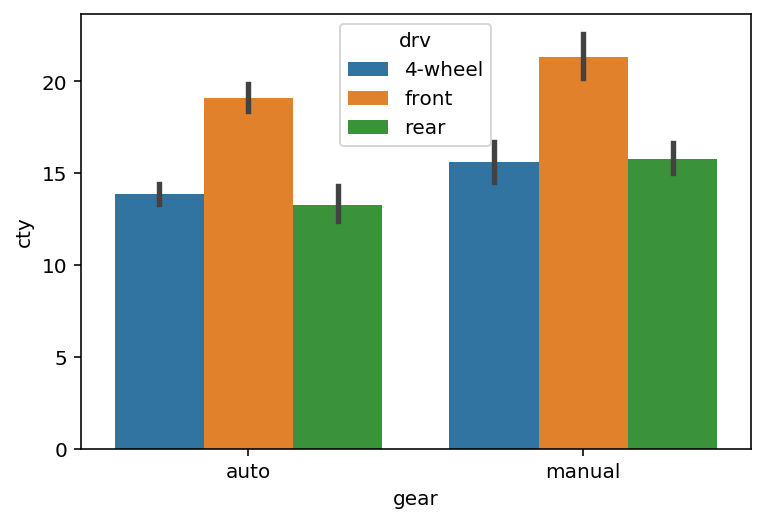

In [12]:
sns.barplot(x='gear', y='cty', data=df,
            hue='drv')

### set 'estimator'

In [13]:
df.groupby('drv')['cty'].describe()

,count,mean,std,min,25%,50%,75%,max
drv,,,,,,,,
4-wheel,103.0,14.330097,2.874459,9.0,13.0,14.0,16.0,21.0
front,106.0,19.971698,3.626510,11.0,18.0,19.0,21.0,35.0
rear,25.0,14.080000,2.215852,11.0,12.0,15.0,15.0,18.0


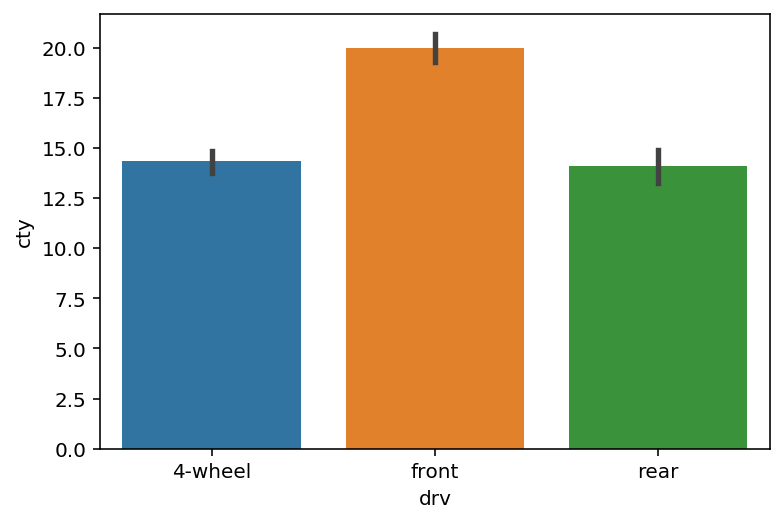

In [14]:
sns.barplot(x='drv', y='cty', data=df)

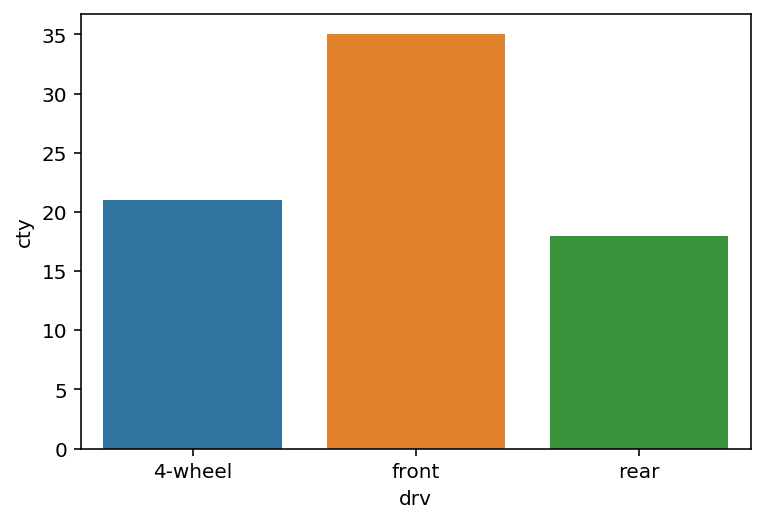

In [15]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=max,
            ci=None)

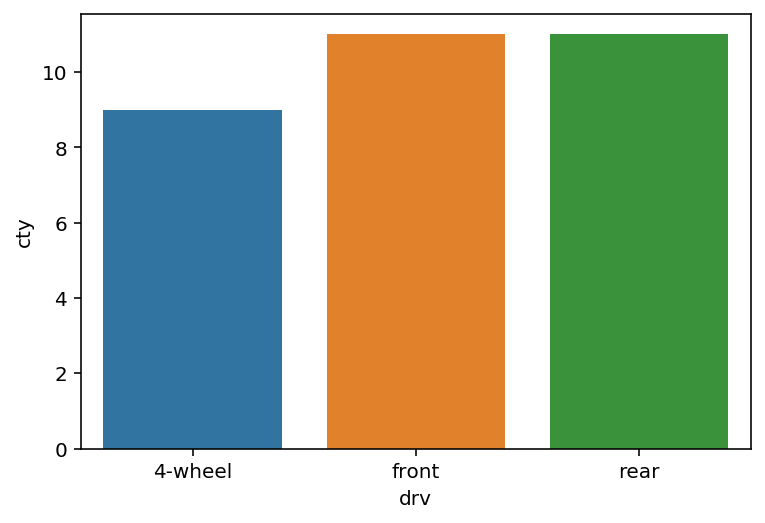

In [16]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=min,
            ci=None)

In [17]:
import numpy as np

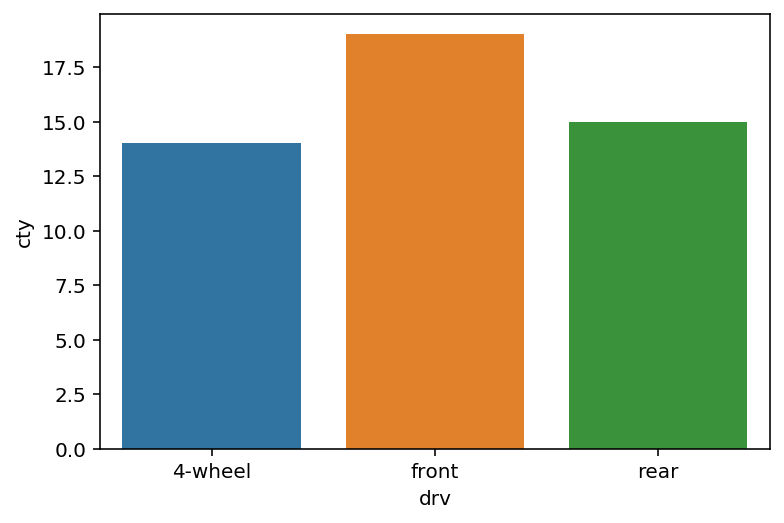

In [18]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=np.median,
            ci=None)

### add an average line

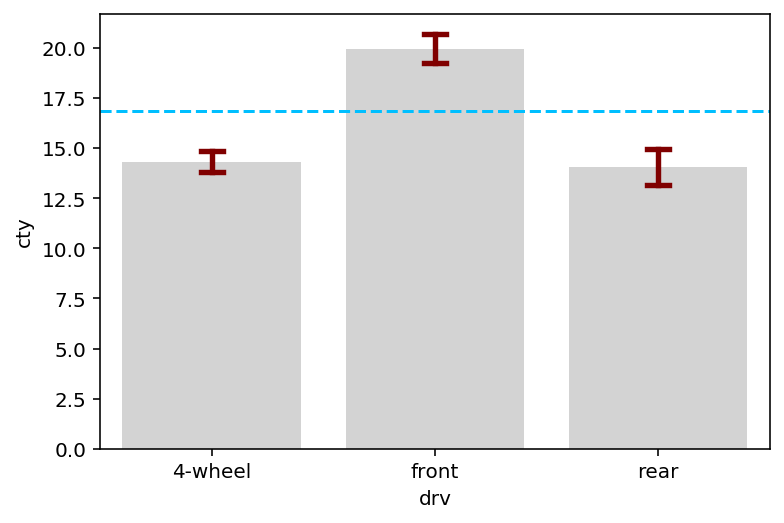

In [19]:
avg=df.cty.mean()
sns.barplot(x='drv', y='cty', data=df, 
            color='lightgray', 
            errcolor='maroon', capsize=.1)
plt.axhline(y=avg, color='deepskyblue', linestyle='--')

### custom order and errorbar (ex. sd)

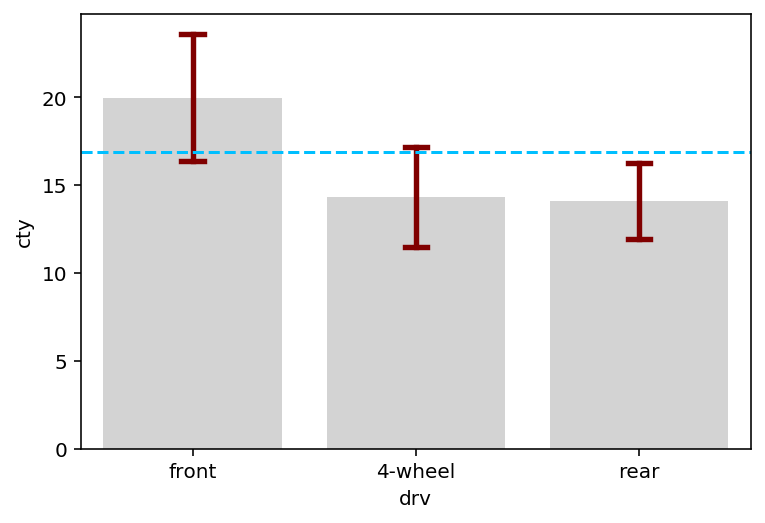

In [20]:
avg=df.cty.mean()
sns.barplot(x='drv', y='cty', data=df, 
            color='lightgray', 
            ci='sd',
            errcolor='maroon', capsize=.1,
            order=['front', '4-wheel', 'rear'])
plt.axhline(y=avg, color='deepskyblue', linestyle='--')

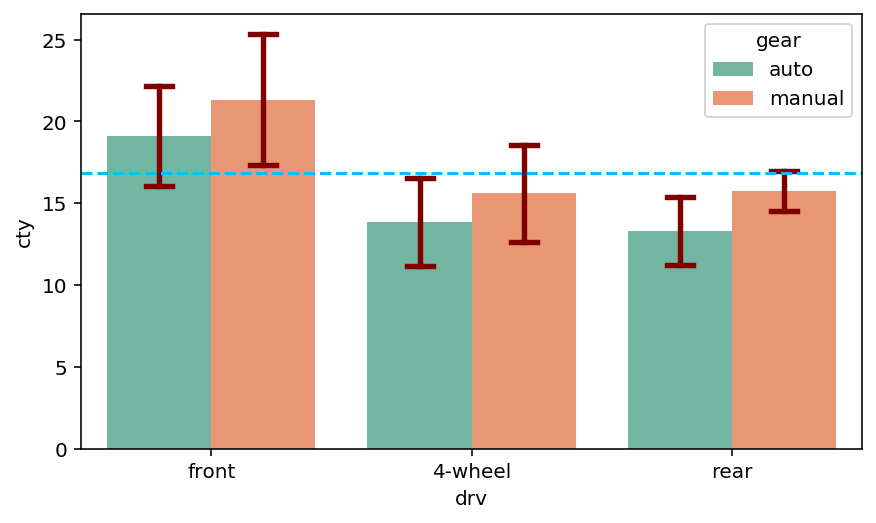

In [21]:
avg=df.cty.mean()
plt.figure(figsize=(7,4))
sns.barplot(x='drv', y='cty', data=df, 
            hue='gear',
            palette='Set2', 
            ci='sd',
            errcolor='maroon', capsize=.1,
            order=['front', '4-wheel', 'rear'],
       )
plt.axhline(y=avg, color='deepskyblue', linestyle='--')
# plt.savefig('bar2.png', dpi=150)
# plt.savefig('bar_a4.pdf', papertype='a4')
# plt.savefig('bar.svg')

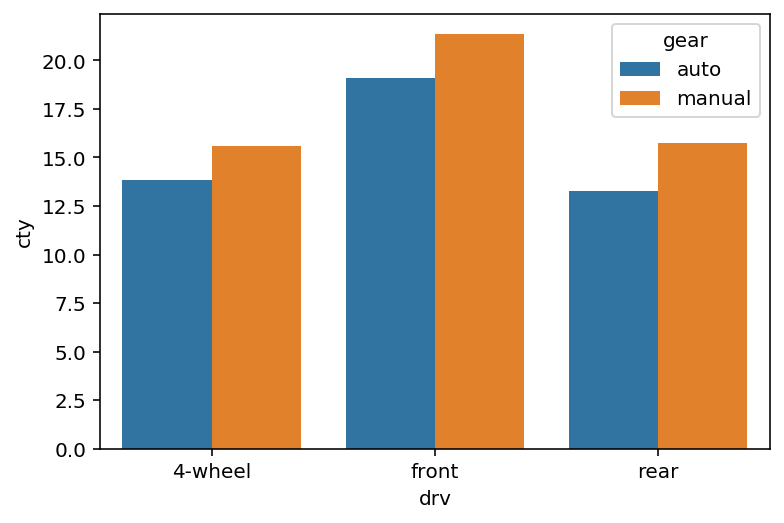

In [22]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', ci=None)

### palette

Text(0.5, 1.0, 'fuel efficiency by drive wheels')

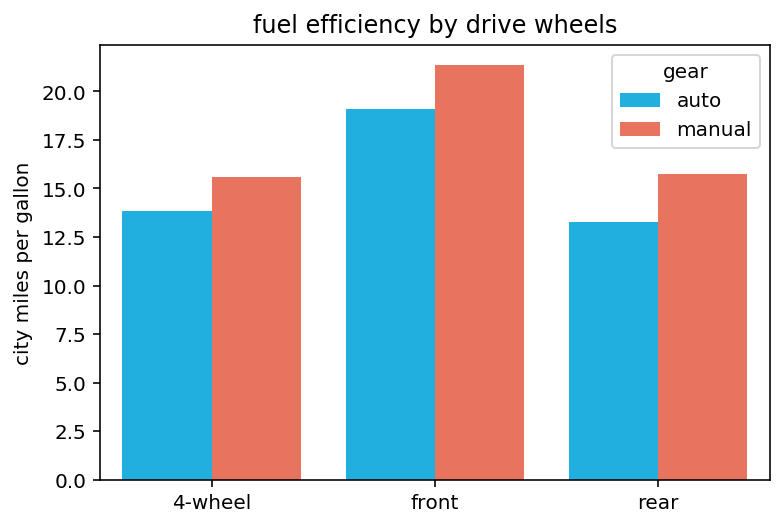

In [23]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', 
            ci=None,
            palette=['deepskyblue', 'tomato'])
plt.xlabel('')
plt.ylabel('city miles per gallon')
plt.title('fuel efficiency by drive wheels')

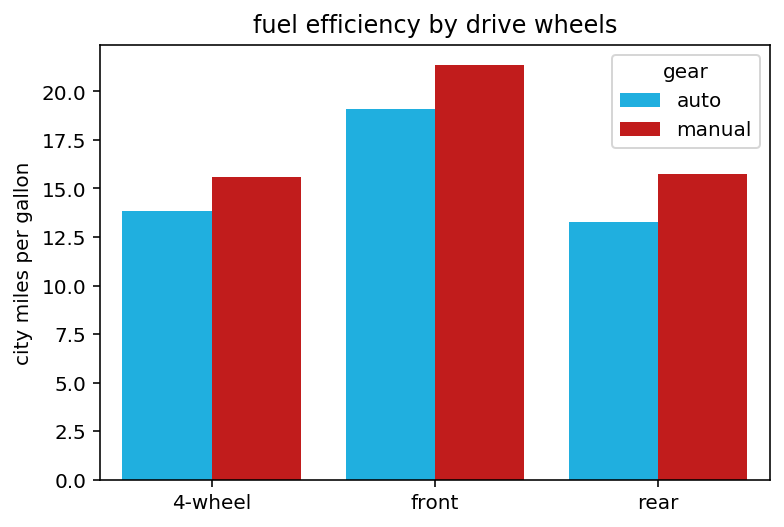

In [24]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', 
            ci=None,
            palette={'auto':'deepskyblue', 'manual':'#dd0000'})
plt.xlabel('')
plt.ylabel('city miles per gallon')
plt.title('fuel efficiency by drive wheels');

### factorplot

/Users/prasert/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/prasert/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


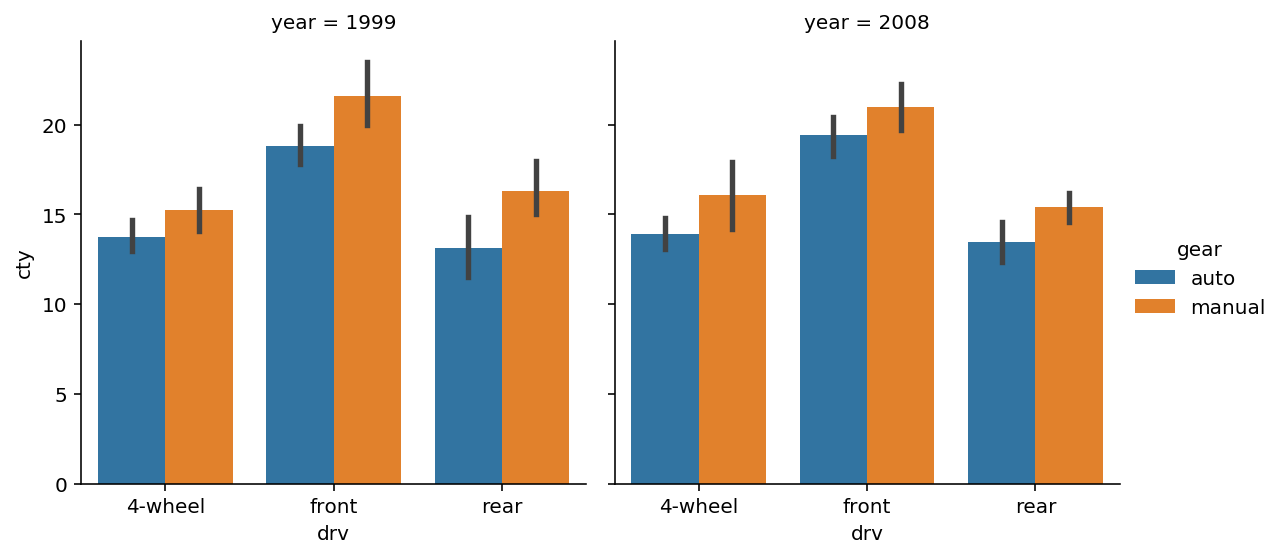

In [25]:
sns.factorplot(x='drv', y='cty', data=df,
               hue="gear", 
               col="year",
               kind="bar",
               size=4, aspect=1);

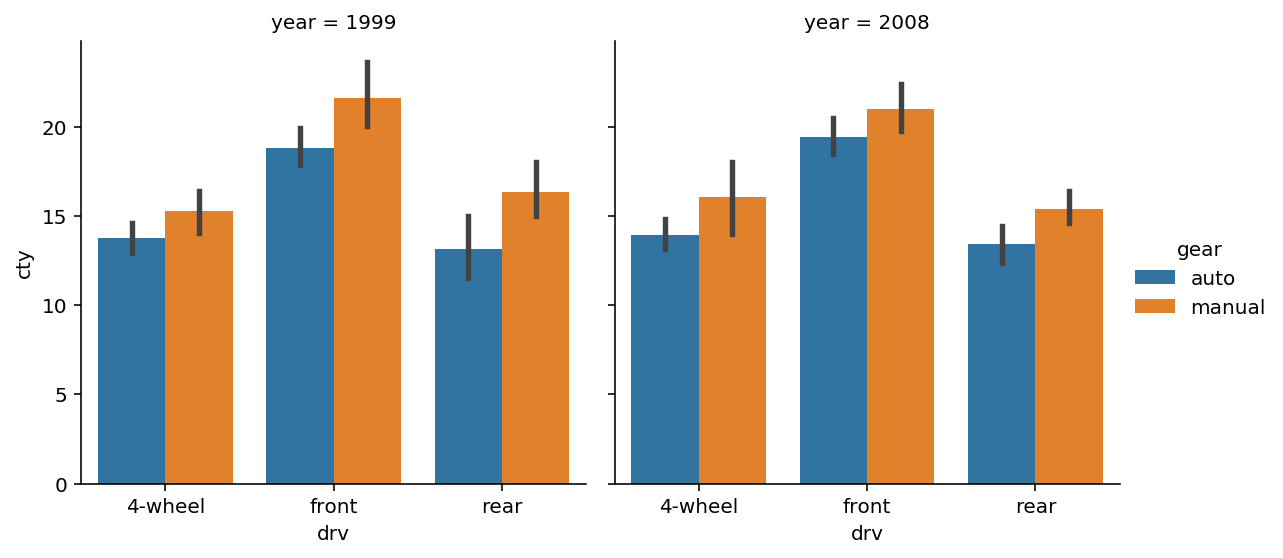

In [26]:
sns.catplot(x='drv', y='cty', data=df,
               hue="gear", 
               col="year",
               kind="bar",
               height=4, aspect=1);

In [27]:
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [28]:
df[df['class'].str.match('compact|suv|midsize')].sample(frac=.05)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
80,ford,explorer 4wd,4.0,2008,6,auto(l5),4-wheel,13,19,r,suv,auto
113,hyundai,sonata,2.5,1999,6,manual(m5),front,18,26,r,midsize,manual
216,volkswagen,jetta,2.0,2008,4,manual(m6),front,21,29,p,compact,manual
78,ford,explorer 4wd,4.0,1999,6,manual(m5),4-wheel,15,19,r,suv,manual
32,chevrolet,malibu,2.4,1999,4,auto(l4),front,19,27,r,midsize,auto
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),rear,14,20,r,suv,auto
157,pontiac,grand prix,3.8,2008,6,auto(l4),front,18,28,r,midsize,auto
11,audi,a4 quattro,2.8,1999,6,auto(l5),4-wheel,15,25,p,compact,auto


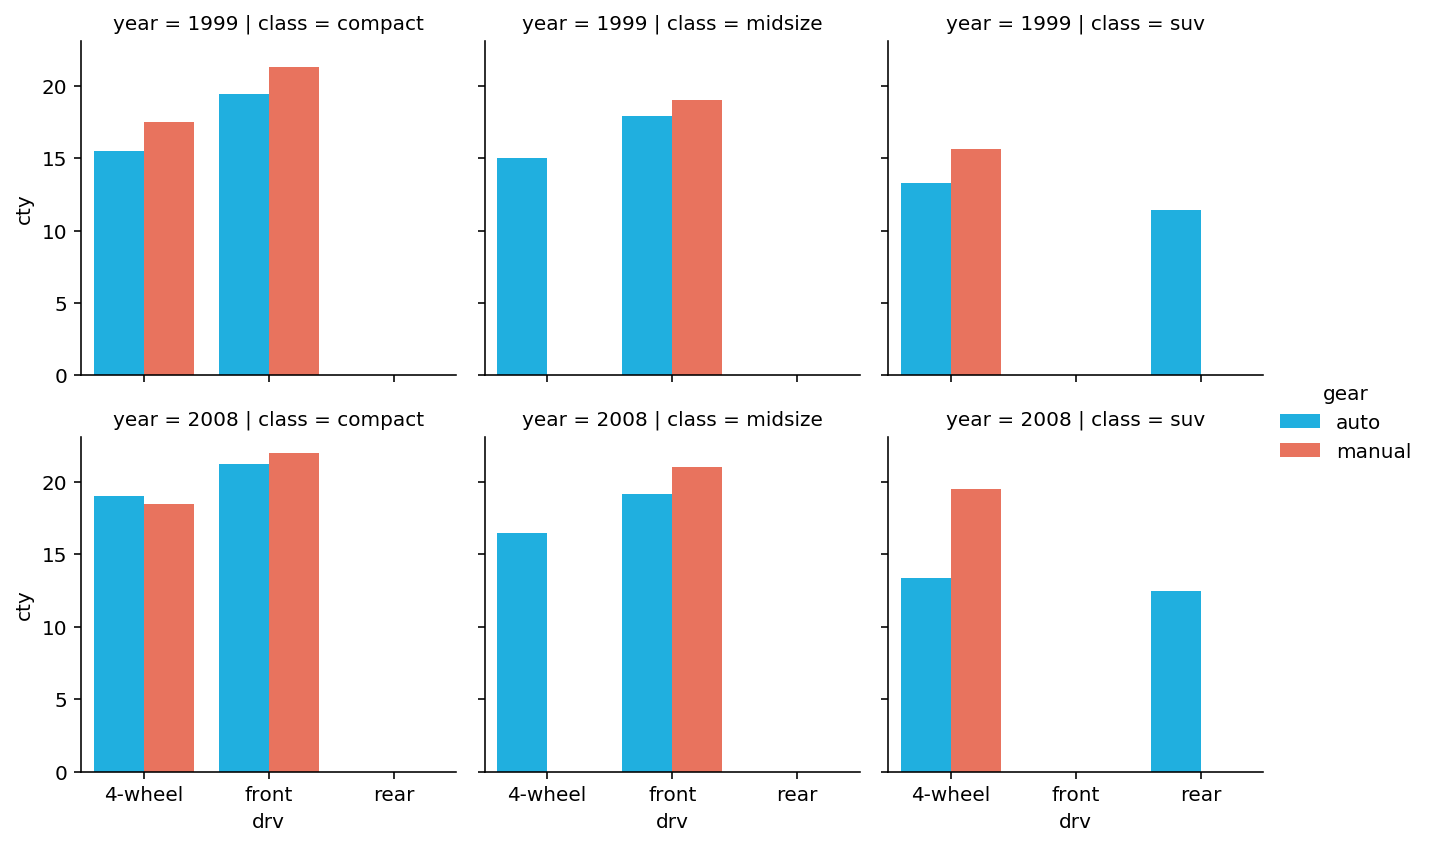

In [29]:
sns.factorplot(x='drv', y='cty', data=df[df['class'].str.match('compact|suv|midsize')],
               hue='gear', 
               row='year',
               col='class',
               kind='bar',
               ci=None,
               palette=['deepskyblue', 'tomato'],
               size=3, aspect=1);

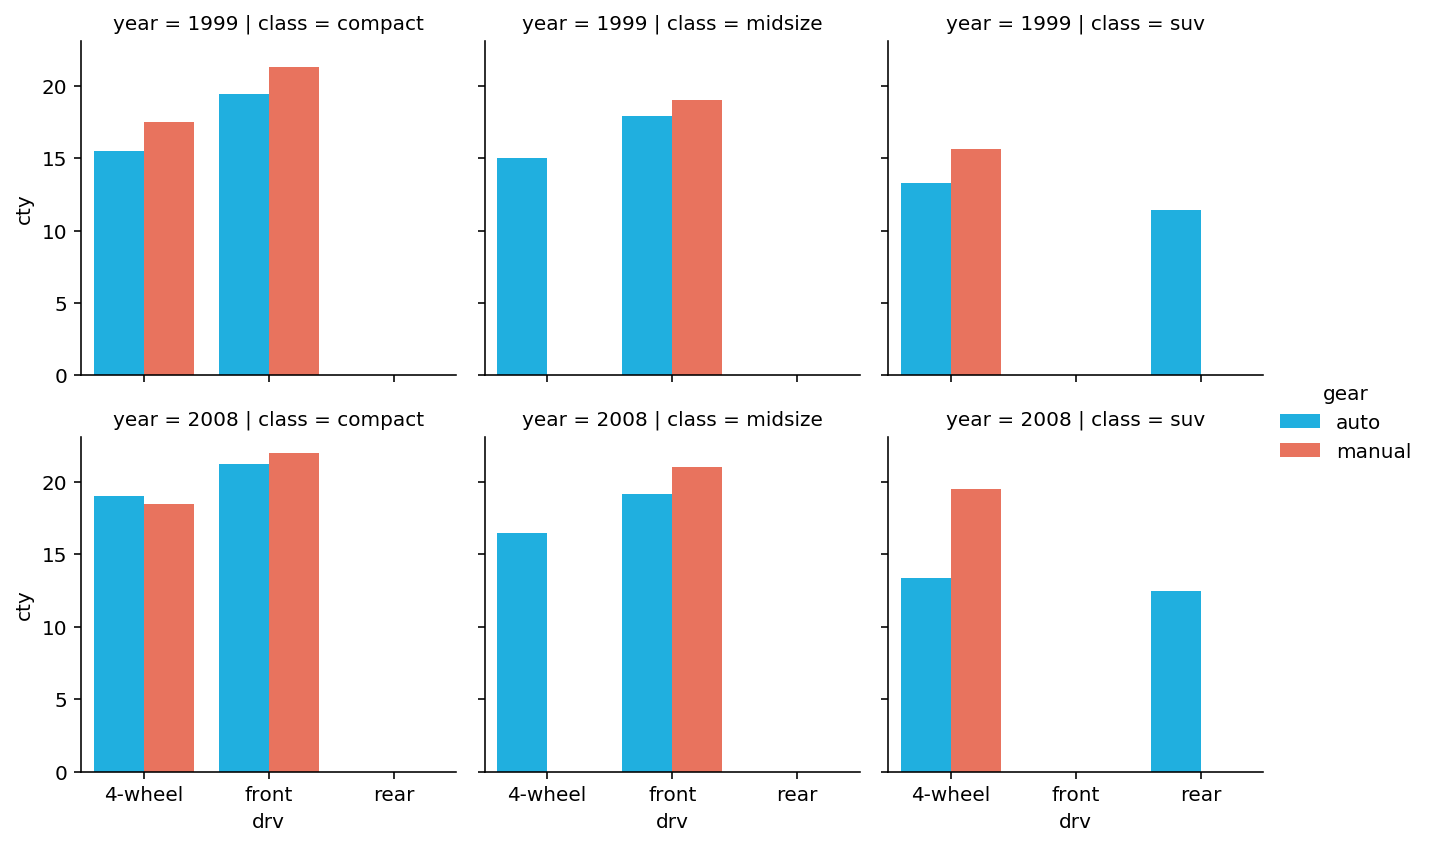

In [30]:
sns.catplot(x='drv', y='cty', data=df[df['class'].str.match('compact|suv|midsize')],
               hue='gear', 
               row='year',
               col='class',
               kind='bar',
               ci=None,
               palette=['deepskyblue', 'tomato'],
               height=3, aspect=1);